<font size='+1' color=red>**Attention:**</font> Data cleaning and other parts of preprocessing of data which we covered in the first assignment, is not neccesary all the time but you may need some of them according to task at hand. So we don't explicitly mention them each time. This is your job to figure out when to apply them.

## <font color='#D61E85' size='+3'>**Q1:**</font> <font size='+2'> **Multivariate least squares** </font>

In a regression task, suppose that instead of trying to predict a single output, we have a training set with multiple outputs for each example:

$$\{(x^{(i)}, y^{(i)}), i=1, ...,m\}, x^{(i)} ∈ \mathbb{R}^n, y^{(i)} ∈ \mathbb{R}^p. $$

Thus for each training example, $y^{(i)}$ is vector-valued, with $p$ entries. We wish to use a linear model to predict the outputs, as in least squares, by specifying the parameter matrix $𝚯$ in

$$y = 𝚯^T x,$$

where $𝚯 ∈ \mathbb{R}^{n×p}$.

<font size='+1'>**(a)**</font> The cost function for this case is

$$J(𝚯) = \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^p \Big((𝚯^Tx^{(i)})_j - y^{(i)}_j\Big)^2.$$

Write $J(𝚯)$ in matrix-vector notation (i.e., without using any summations). [Hint: Start with the $m × n$ design matrix

$$
X =
\begin{bmatrix}
\overline{\space\space\space\space\space\space} & (x^{(1)})^T & \overline{\space\space\space\space\space\space}\\
\overline{\space\space\space\space\space\space} & (x^{(2)})^T & \overline{\space\space\space\space\space\space}\\
&\vdots&\\
\overline{\space\space\space\space\space\space} & (x^{(m)})^T & \overline{\space\space\space\space\space\space}\\
\end{bmatrix}
$$

and the $m × p$ target matrix

$$
Y =
\begin{bmatrix}
\overline{\space\space\space\space\space\space} & (y^{(1)})^T & \overline{\space\space\space\space\space\space}\\
\overline{\space\space\space\space\space\space} & (y^{(2)})^T & \overline{\space\space\space\space\space\space}\\
&\vdots&\\
\overline{\space\space\space\space\space\space} & (y^{(m)})^T & \overline{\space\space\space\space\space\space}\\
\end{bmatrix}
$$

and then work out how to express $J(𝚯)$ in terms of these matrices.]

<font size='+1'>**(b)**</font> Find the closed form solution for $𝚯$ which minimizes $J(𝚯)$. This is the equivalent to the normal equations for the multivariate case.

<font size='+1'>**(c)**</font> Suppose instead of considering the multivariate vectors $y^{(i)}$ all at once, we instead compute each variable $y^{(i)}_j$ separately for each $j = 1,\dots,p$. In this case, we have a $p$ individual linear models, of the form

$$ y^{(i)}_j = θ^T_j x^{(i)}, j = 1, \dots , p. $$

(So here, each $θ_j ∈ \mathbb{R}^n$). How do the parameters from these $p$ independent least squares problems compare to the multivariate solution?

<font color='#8FCF26' size='+2'>**A1:**</font>

### Part (a)

The cost function for multivariate least squares can be expressed in matrix-vector notation as:

$J(\Theta) = \frac{1}{2} \| X\Theta - Y \|_F^2 $

Here, $ X $ is the design matrix of size $m \times n $ (with each row being a transposed input vector $x^{(i)T} $), $ \Theta $ is the parameter matrix of size $ n \times p $, and $ Y $ is the target matrix of size $ m \times p $ (with each row being a transposed output vector $ y^{(i)T} $). The term $ \| X\Theta - Y \|_F $ denotes the Frobenius norm, which is the square root of the sum of the squares of all elements in the matrix $ X\Theta - Y $.

### Part (b)

To derive the normal equations, we need to find the value of $\Theta $ that minimizes $ J(\Theta) $. This is done by setting the gradient of $ J(\Theta) $ with respect to $ \Theta $ to zero.

The gradient of $ J(\Theta) $ is:

$ \nabla_\Theta J(\Theta) = X^T(X\Theta - Y) $

Setting this to zero gives the normal equations:

$ X^T(X\Theta - Y) = 0 $
$ X^TX\Theta = X^TY $
$ \Theta = (X^TX)^{-1}X^TY $

This equation gives the value of $ \Theta $ that minimizes the cost function $ J(\Theta) $.

### Part (c)

The normal equations might not be the best method to solve for $ \Theta $ under the following circumstances:

1. **Non-Invertible $ X^TX $:** If $ X^TX $ is non-invertible (or nearly so), which can happen if features are linearly dependent or if there are more features than training examples, the normal equations cannot be directly applied.

2. **Computational Efficiency:** For very large datasets, the computation of $ (X^TX)^{-1} $ can be very computationally expensive and slow, as it requires $ O(n^3) $ operations, where $ n $ is the number of features.

3. **Numerical Stability:** Numerical instability can occur in the inversion of $X^TX$, especially when the matrix is ill-conditioned (i.e., has a high condition number).

In such cases, alternative methods like gradient descent or more advanced optimization algorithms might be more appropriate.

As you can see the normal equations of multivariate case is simillar to the univariate case. Using this normal equation we can find the model parameters directly without the need of gradient descent.

<font size='+1'>**(d)**</font> At first, try to implement linear regression model using the normal equation obtained from the previous question. Secondly, consider [this](https://www.kaggle.com/datasets/kyasar/boston-housing) dataset. Split the data to 70-15-15 and try to fit your model on training set in order to predict the `crim` and `tax` columns. Then evaluate it using the test set. Report the loss and accuracy of each split of the data.

<font color='#8FCF26' size='+2'>**A1:**</font> Part (d) <br> Create some cell down below to write and run your code.

In [1]:
# Download the Boston housing dataset
! gdown 1yodR3W-YhW6bfawrVQ9FKWGCR24gdEC0


Downloading...
From: https://drive.google.com/uc?id=1yodR3W-YhW6bfawrVQ9FKWGCR24gdEC0
To: /content/boston_housing.csv
100% 38.5k/38.5k [00:00<00:00, 126MB/s]


In [2]:
import pandas as pd

# Load the Boston housing dataset
boston_housing_path = 'boston_housing.csv'
boston_data = pd.read_csv(boston_housing_path)

# Display the first few rows of the dataset
boston_data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

def add_intercept(X):
    """Add an intercept term to the feature matrix."""
    return np.c_[np.ones(X.shape[0]), X]

def compute_theta_normal_equation(X, y):
    """Compute theta using the normal equations."""
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Define the new target variables (crim and tax) and the remaining features
new_targets = boston_data[['crim', 'tax']]
new_features = boston_data.drop(['crim', 'tax'], axis=1)

# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(new_features, new_targets, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Add an intercept term to the feature matrices
X_train = add_intercept(X_train)
X_val = add_intercept(X_val)
X_test = add_intercept(X_test)

# Compute theta using the normal equations for the training set
theta_train = compute_theta_normal_equation(X_train, y_train)

theta_train

,crim,tax
0,15.893373,174.783536
1,0.041295,1.119737
2,-0.017822,6.582339
3,-1.029058,-20.928177
4,-13.236227,67.086129
5,0.557459,-1.810165
6,0.012969,0.015456
7,-0.984959,-3.614440
8,0.564112,13.941538
9,-0.331745,2.297318


In [4]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to calculate MSE and R2 Score
def calculate_metrics(X, y, theta):
    predictions = X @ theta
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    return mse, r2

# Function to format and print the metrics for each dataset split
def print_metrics(mse, r2, dataset_name):
    print(f"{dataset_name} Set Metrics:")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  R^2 Score: {r2:.3f}")
    print("")

# Calculate metrics for training, validation, and test sets
mse_train, r2_train = calculate_metrics(X_train, y_train, theta_train)
mse_val, r2_val = calculate_metrics(X_val, y_val, theta_train)
mse_test, r2_test = calculate_metrics(X_test, y_test, theta_train)

# Print formatted metrics for training, validation, and test sets
print_metrics(mse_train, r2_train, "Training")
print_metrics(mse_val, r2_val, "Validation")
print_metrics(mse_test, r2_test, "Test")


Training Set Metrics:
  Mean Squared Error (MSE): 1561.39
  R^2 Score: 0.664

Validation Set Metrics:
  Mean Squared Error (MSE): 2172.24
  R^2 Score: 0.729

Test Set Metrics:
  Mean Squared Error (MSE): 1103.84
  R^2 Score: 0.669



## <font color='#D61E85' size='+3'>**Q2:**</font> <font size='+2'> **$l^1$ and $l^2$-Regularization** </font>

When training a machine learning model, it's possible for the model to exhibit high accuracy on the training set while performing poorly on the test data.

This situation indicates a potential issue with *overfitting*. Overfitting occurs when the machine learning model attempts to fit the training data too closely, capturing not only the underlying patterns but also noise and inaccuracies present in the dataset. Consequently, the model becomes less effective and accurate when applied to new, unseen data.

To address overfitting, various methods can be employed. In the context of Linear Regression, one approach involves the utilization of regularization techniques, commonly known as $l^1$ and $l^2$-regularization methods.

<font size='+1'>**(a)**</font> First, write down the cost function for $l^1$ and $l^2$-regularization and with the help of the following image, try to explain their differences.

<font size='+1'>**(b)**</font> Imagine feature selection is crucial for your task, which regularization technique will you use? Explain the reason behind of your decision and try to justify your answer using the derivative of the cost functions which you wrote for the part (a).

![](https://miro.medium.com/v2/resize:fit:800/1*ZeINTX82W7vwqLMHHWEaTQ.jpeg)




<font color='#8FCF26' size='+2'>**A2:**</font>
### Part (a)

**$l^1$-Regularization (Lasso):**
The cost function for $l^1$-regularized linear regression (Lasso) is:
$$ J(\Theta) = \frac{1}{2m} \sum_{i=1}^m (h_\Theta(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j=1}^n |\Theta_j| $$
where $h_\Theta(x^{(i)})$ is the hypothesis function, $\Theta_j$ represents the model parameters (excluding the intercept), $m$ is the number of training examples, and $\lambda$ is the regularization parameter.

**$l^2$-Regularization (Ridge):**
The cost function for $l^2$-regularized linear regression (Ridge) is:
$$ J(\Theta) = \frac{1}{2m} \sum_{i=1}^m (h_\Theta(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j=1}^n \Theta_j^2 $$

**Differences:**
- **Impact on Parameters:** $l^1$ regularization tends to produce sparse solutions, often setting some parameters to zero, which can be interpreted as a form of automatic feature selection. $l^2$ regularization, on the other hand, typically results in smaller but non-zero parameters.
- **Geometry:** In terms of geometry, $l^1$ regularization forms a diamond-shaped constraint (leading to sparsity), while $l^2$ forms a circular constraint (leading to smaller but dense parameters).
- **Robustness:** $l^1$ regularization is more robust to outliers, whereas $l^2$ is less sensitive to the scale of the input features.

### Part (b)

If feature selection is crucial for the task, $l^1$-regularization (Lasso) is often preferred. This is because Lasso has the property of producing sparse solutions, effectively shrinking some coefficients to zero. This behavior can help in identifying which features are most important for predicting the target variable.

The derivative of the cost function with respect to $\Theta$ in Lasso introduces a constant term that forces some coefficients to become zero when the regularization parameter $\lambda$ is sufficiently large, thus performing feature selection.


<font size='+1'>**(c)**</font> In this part we are going to see the impact of each regularization technique and to get more familiar with concept of overfitting and underfitting.
First, generate the relevant data using the following codes.


In [5]:
import numpy as np

X = np.arange(-10,10,0.2)
Y = 2*np.cos(X)/-np.pi + (2*X)/(2*np.pi)+2*np.cos(3*X)/(-3*np.pi)

Now, add white Gaussian noise to the data with an impact factor of $0.1$. Try to fit a function of degree 1 to 15 to the data.

In [6]:
mean = 0
std = 1
noise = np.random.normal(mean, std, Y.shape) * 0.1
Y_noisy = Y + noise

# Displaying the first few values of X and Y_noisy as a check
X[:5], Y_noisy[:5]

(array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2]),
 array([-2.48916783, -2.42168593, -2.31676274, -2.17142999, -2.26820628]))

- Determine the best and worst degree in terms of the total cost.

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Function to fit a polynomial model and calculate MSE
def fit_and_evaluate_poly_model(X, Y, degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, Y)
    Y_pred = model.predict(X_poly)
    mse = mean_squared_error(Y, Y_pred)
    return model, mse

# Fit models and calculate MSE for each degree
degrees = range(1, 16)
mse_values = []

for degree in degrees:
    _, mse = fit_and_evaluate_poly_model(X, Y_noisy, degree)
    mse_values.append(mse)

# Determine the best and worst degrees in terms of MSE
best_degree = degrees[np.argmin(mse_values)]
worst_degree = degrees[np.argmax(mse_values)]

best_degree, worst_degree, mse_values

(15,
 1,
 [0.25221336709728837,
  0.23165237605673172,
  0.2316404482542586,
  0.18829909754565044,
  0.18829839146332353,
  0.17181026402250998,
  0.17077714198352378,
  0.07151366607442385,
  0.07092817483951426,
  0.03529496268382417,
  0.03529432798270543,
  0.02928603381742874,
  0.029171858186256512,
  0.028419997061380698,
  0.028233844301354904])

- Draw the fit diagram for the best and worst degrees and also the degree of 1, 3, 8, and 15 and report the MSE values.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting with Seaborn
plt.figure(figsize=(12, 6))

# Function to plot the fitted polynomial model using Seaborn
def plot_poly_model_seaborn(X, Y, model, degree, title, show=True):
    # Generate a range of values for plotting the fitted model
    X_plot = np.linspace(X.min(), X.max(), 500)
    poly_features = PolynomialFeatures(degree=degree)
    X_plot_poly = poly_features.fit_transform(X_plot.reshape(-1, 1))

    # Predictions for the plot
    Y_plot = model.predict(X_plot_poly)

    # Plotting the data and the model
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=X, y=Y, color='blue', label='Data', marker="x", s=75, palette = sns.color_palette("coolwarm", as_cmap=True))
    sns.lineplot(x=X_plot, y=Y_plot, color='red', label=f'Degree {degree}')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    if show:
        plt.show()

<Figure size 1200x600 with 0 Axes>

<ipython-input-8-c3876a1963e0>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X, y=Y, color='blue', label='Data', marker="x", s=75, palette = sns.color_palette("coolwarm", as_cmap=True))


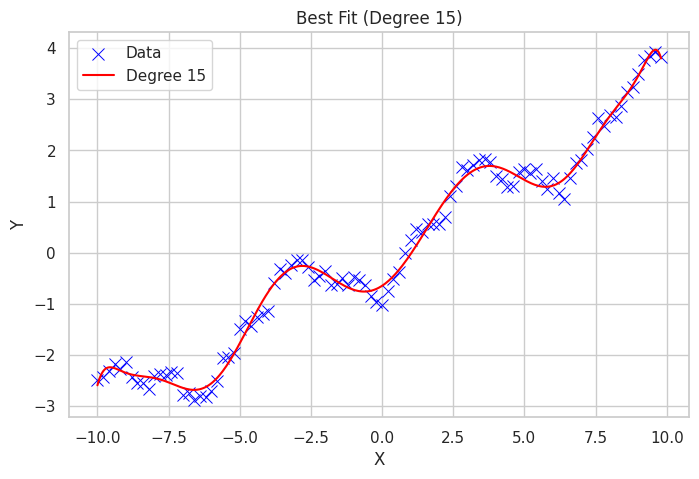

<ipython-input-8-c3876a1963e0>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X, y=Y, color='blue', label='Data', marker="x", s=75, palette = sns.color_palette("coolwarm", as_cmap=True))


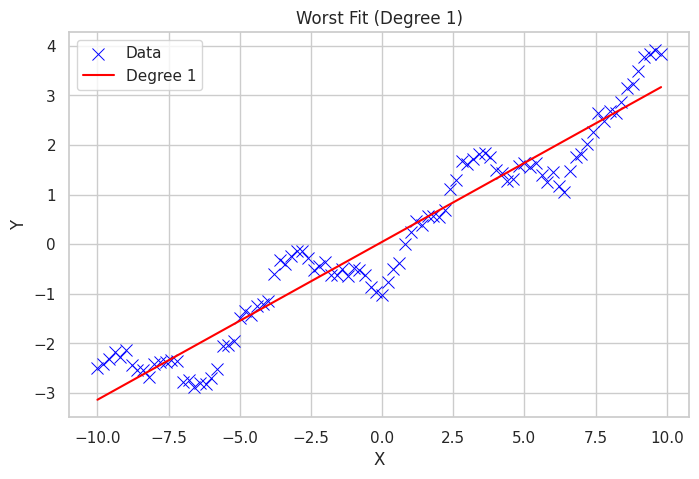

In [9]:
# Plot for the best degree
model_best, _ = fit_and_evaluate_poly_model(X, Y_noisy, best_degree)
plot_poly_model_seaborn(X, Y_noisy, model_best, best_degree, f'Best Fit (Degree {best_degree})')

# Plot for the worst degree
model_worst, _ = fit_and_evaluate_poly_model(X, Y_noisy, worst_degree)
plot_poly_model_seaborn(X, Y_noisy, model_worst, worst_degree, f'Worst Fit (Degree {worst_degree})')


<ipython-input-8-c3876a1963e0>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X, y=Y, color='blue', label='Data', marker="x", s=75, palette = sns.color_palette("coolwarm", as_cmap=True))
<ipython-input-8-c3876a1963e0>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X, y=Y, color='blue', label='Data', marker="x", s=75, palette = sns.color_palette("coolwarm", as_cmap=True))
<ipython-input-8-c3876a1963e0>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X, y=Y, color='blue', label='Data', marker="x", s=75, palette = sns.color_palette("coolwarm", as_cmap=True))
<ipython-input-8-c3876a1963e0>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X, y=Y, color='blue', label='Data', marker="x", s=75, palette = sns.color_palette("coolwarm", as_cmap=True))


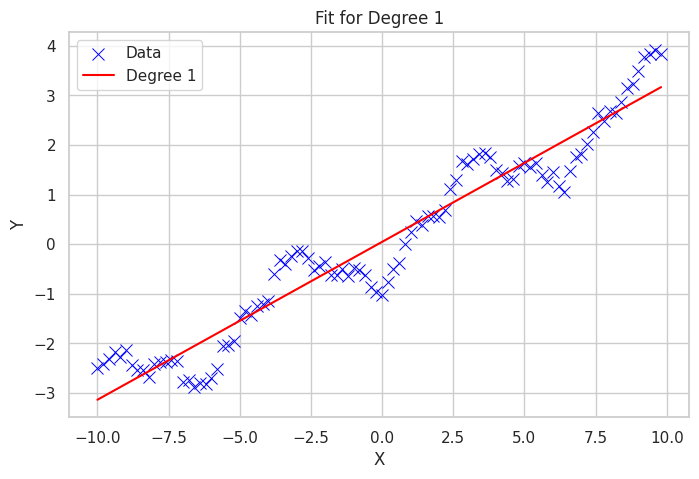

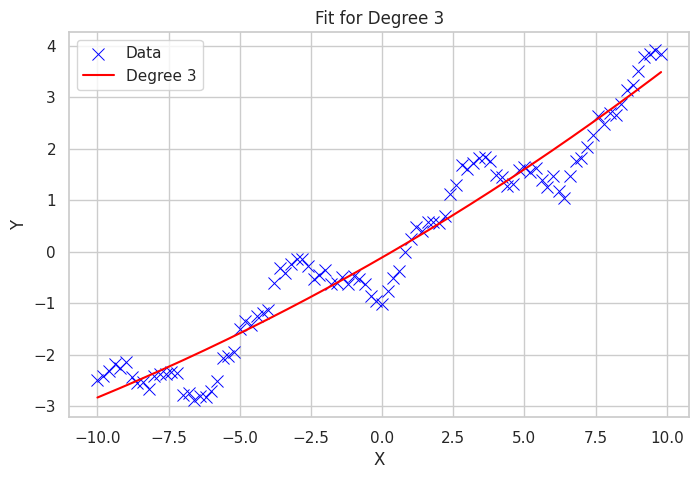

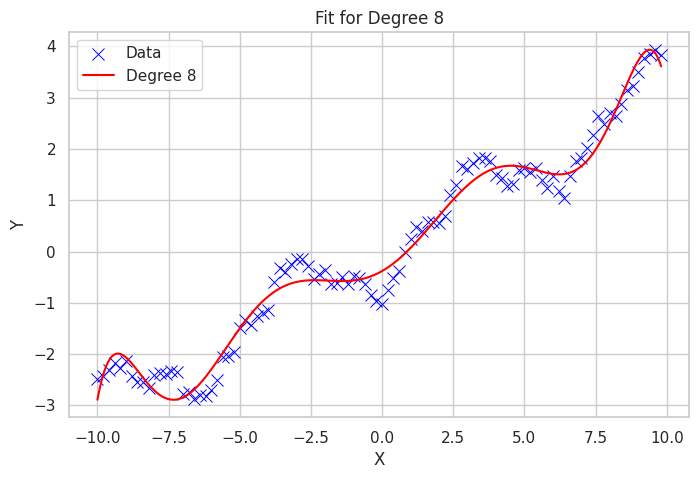

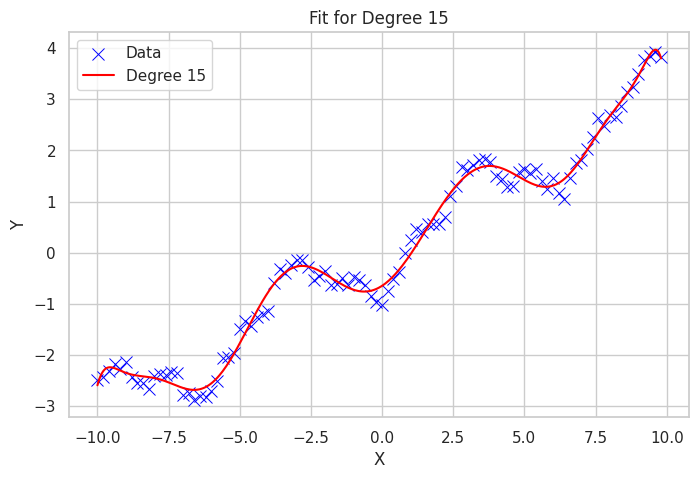

MSE for Degree 1: 0.2522
MSE for Degree 3: 0.2316
MSE for Degree 8: 0.0715
MSE for Degree 14: 0.0284
MSE for Degree 15: 0.0282


In [10]:
# Additional plots for degrees 1, 3, 8, and 15
for degree in [1, 3, 8, 15]:
    model, _ = fit_and_evaluate_poly_model(X, Y_noisy, degree)
    plot_poly_model_seaborn(X, Y_noisy, model, degree, f'Fit for Degree {degree}', show=degree == 15)

# Print MSE values for the specified degrees
for degree in [1, 3, 8, 14, 15]:
    mse_value = mse_values[degree - 1]
    print(f"MSE for Degree {degree}: {mse_value:.4f}")



- Describe the results of your observations by mentioning the values of bias and variance


  - **Lower-Degree Models** (e.g., Degree 1): These models have high bias and low variance. The high bias indicates that the model is too simplistic and does not capture the complexity of the underlying data. This leads to underfitting, where the model fails to represent the true relationship, as evident in the higher MSE.
  - **Higher-Degree Models** (e.g., Degree 15): These models have low bias but high variance. The low bias means the model can capture more complex patterns in the data. However, the high variance suggests that the model is too sensitive to the noise in the training data, leading to overfitting. This is often not apparent in the training error (MSE) but becomes evident when the model is applied to new, unseen data.

- Now, we only consider the degree of 15  in order to see the impact of regularization on overfitting. Plot the data, your estimated function (degree of 15), and the true function Y in a single plot.

In [11]:
from sklearn.linear_model import Lasso, Ridge

# Function to fit a polynomial model with regularization and calculate MSE
def fit_poly_model_with_regularization(X, Y, degree, alpha, reg_type='l2'):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X.reshape(-1, 1))

    if reg_type == 'l1':  # Lasso Regularization
        model = Lasso(alpha=alpha, max_iter=10000)
    else:  # Ridge Regularization
        model = Ridge(alpha=alpha)

    model.fit(X_poly, Y)
    return model

# Function to plot with Seaborn
def plot_poly_model_seaborn(X, Y, model, degree, label, show=True):
    # Generate a range of values for plotting the fitted model
    X_plot = np.linspace(X.min(), X.max(), 500)
    poly_features = PolynomialFeatures(degree=degree)
    X_plot_poly = poly_features.fit_transform(X_plot.reshape(-1, 1))

    # Predictions for the plot
    Y_plot = model.predict(X_plot_poly)

    # Plotting the model
    sns.lineplot(x=X_plot, y=Y_plot, label=label, palette=sns.color_palette("husl", 9) )


<ipython-input-11-8060f6f61ed8>:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=X_plot, y=Y_plot, label=label, palette=sns.color_palette("husl", 9) )
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.215e+00, tolerance: 3.629e-02
  model = cd_fast.enet_coordinate_descent(
<ipython-input-11-8060f6f61ed8>:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=X_plot, y=Y_plot, label=label, palette=sns.color_palette("husl", 9) )
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.9026e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-11-8060f6

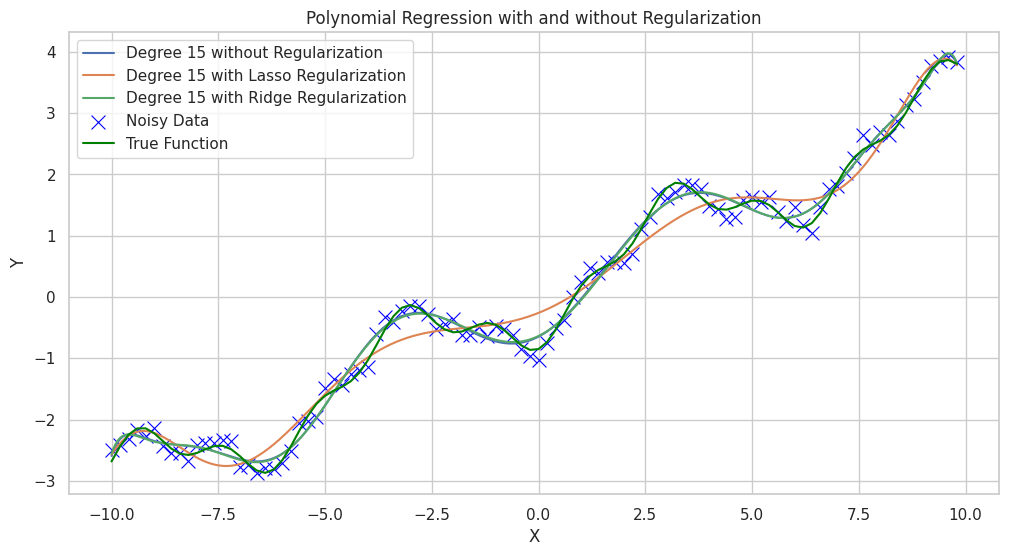

In [12]:
plt.figure(figsize=(12, 6))

# Degree 15 polynomial model without regularization
model_degree_15, _ = fit_and_evaluate_poly_model(X, Y_noisy, 15)
plot_poly_model_seaborn(X, Y_noisy, model_degree_15, 15, 'Degree 15 without Regularization', show=False)

# Degree 15 polynomial model with Lasso regularization
model_lasso = fit_poly_model_with_regularization(X, Y_noisy, 15, alpha=0.01, reg_type='l1')
plot_poly_model_seaborn(X, Y_noisy, model_lasso, 15, 'Degree 15 with Lasso Regularization', show=False)

# Degree 15 polynomial model with Ridge regularization
model_ridge = fit_poly_model_with_regularization(X, Y_noisy, 15, alpha=1, reg_type='l2')
plot_poly_model_seaborn(X, Y_noisy, model_ridge, 15, 'Degree 15 with Ridge Regularization', show=False)

# Plotting the true function and the noisy data
sns.scatterplot(x=X, y=Y_noisy, color='blue', label='Noisy Data', marker='x', s=100)
sns.lineplot(x=np.sort(X), y=2 * np.cos(np.sort(X)) / -np.pi + (2 * np.sort(X)) / (2 * np.pi) + 2 * np.cos(3 * np.sort(X)) / (-3 * np.pi),
             color='green', label='True Function', palette=sns.color_palette("husl", 9))


plt.title('Polynomial Regression with and without Regularization')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Answer these questions:
1. Explain why does overfitting happen?
2. Discuss about the training error and generalization error of this model.






<font color='#8FCF26' size='+2'>**A2:**</font>

1. Overfitting occurs when a model learns not only the underlying patterns in the training data but also its noise and fluctuations. In high-degree polynomial fitting, overfitting is common because the model becomes overly complex and starts fitting to the random noise in the training set, rather than capturing the true underlying relationship. This leads to poor generalization on new, unseen data.


2. - **Training Error**: This is the error of the model on the training data. A complex model, like a high-degree polynomial, can have a very low training error because it fits the training data very closely.
  - **Generalization Error**: This is the error of the model on new, unseen data. An overfitted model typically has a high generalization error because it fails to perform well on data that it hasn't seen before, as it's too tailored to the specificities of the training data.

Now, you should do:
1. Add $l^2$ regularizer to your model ($λ=1$).
2. Plot data, your estimated function, and the true function in a single plot.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.9026e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-11-8060f6f61ed8>:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=X_plot, y=Y_plot, label=label, palette=sns.color_palette("husl", 9) )
<ipython-input-13-da80cfa8078b>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X, y=Y_noisy, color='blue', label='Noisy Data', marker='x',palette=sns.color_palette("husl", 9))
<ipython-input-13-da80cfa8078b>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=np.sort(X), y=2 * np.cos(np.sort(X)) / -np.pi + (2 * np.sort(X)) / (2 * np.pi) + 2 * np.cos(3 * np.sort(X)) / (-3 * np.pi),


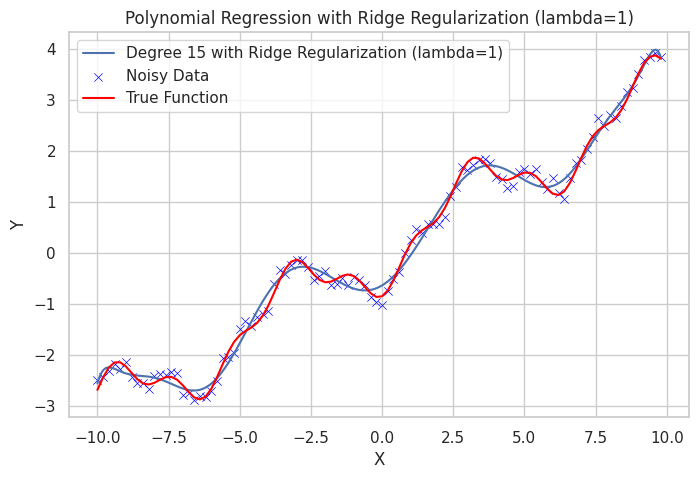

In [13]:
# Degree 15 polynomial model with Ridge regularization (lambda = 1)
model_ridge_lambda1 = fit_poly_model_with_regularization(X, Y_noisy, 15, alpha=1, reg_type='l2')

# Plotting with Seaborn
plt.figure(figsize=(8, 5))

# Plotting the estimated function with Ridge regularization
plot_poly_model_seaborn(X, Y_noisy, model_ridge_lambda1, 15, 'Degree 15 with Ridge Regularization (lambda=1)', show=False)

# Plotting the true function and the noisy data
sns.scatterplot(x=X, y=Y_noisy, color='blue', label='Noisy Data', marker='x',palette=sns.color_palette("husl", 9))
sns.lineplot(x=np.sort(X), y=2 * np.cos(np.sort(X)) / -np.pi + (2 * np.sort(X)) / (2 * np.pi) + 2 * np.cos(3 * np.sort(X)) / (-3 * np.pi),
             color='red', label='True Function',palette=sns.color_palette("husl", 9))

plt.title('Polynomial Regression with Ridge Regularization (lambda=1)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Move on to $l^1$, let's see its impact. You should do the following steps:
1. Add $l^1$ regularizer to your model ($λ=1$).
2. Plot data, your estimated function, and the true function in a single plot.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.242e+01, tolerance: 3.629e-02
  model = cd_fast.enet_coordinate_descent(
<ipython-input-11-8060f6f61ed8>:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=X_plot, y=Y_plot, label=label, palette=sns.color_palette("husl", 9) )
<ipython-input-14-d14cc390f181>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X, y=Y_noisy, color='blue', label='Noisy Data', marker='x',palette=sns.color_palette("husl", 9))
<ipython-input-14-d14cc390f181>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=np.sort(X), y=2 * np.cos(np.sort(X)) / -np.pi + (2 * np.sort(X)) / (2 * np.pi) + 2 * np.cos

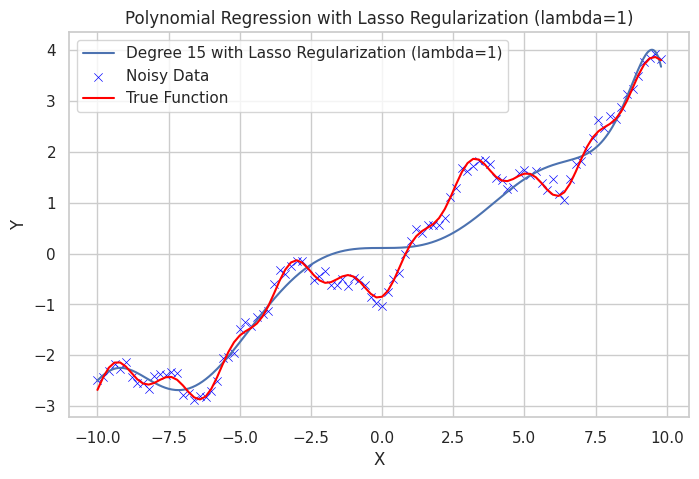

In [14]:
# Degree 15 polynomial model with Ridge regularization (lambda = 1)
model_lasso_lambda1 = fit_poly_model_with_regularization(X, Y_noisy, 15, alpha=1, reg_type='l1')

# Plotting with Seaborn
plt.figure(figsize=(8, 5))

# Plotting the estimated function with Ridge regularization
plot_poly_model_seaborn(X, Y_noisy, model_lasso_lambda1, 15, 'Degree 15 with Lasso Regularization (lambda=1)', show=False)

# Plotting the true function and the noisy data
sns.scatterplot(x=X, y=Y_noisy, color='blue', label='Noisy Data', marker='x',palette=sns.color_palette("husl", 9))
sns.lineplot(x=np.sort(X), y=2 * np.cos(np.sort(X)) / -np.pi + (2 * np.sort(X)) / (2 * np.pi) + 2 * np.cos(3 * np.sort(X)) / (-3 * np.pi),
             color='red', label='True Function',palette=sns.color_palette("husl", 9))

plt.title('Polynomial Regression with Lasso Regularization (lambda=1)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


For each model, plot a histogram of the value of their parameters ($w_i$).

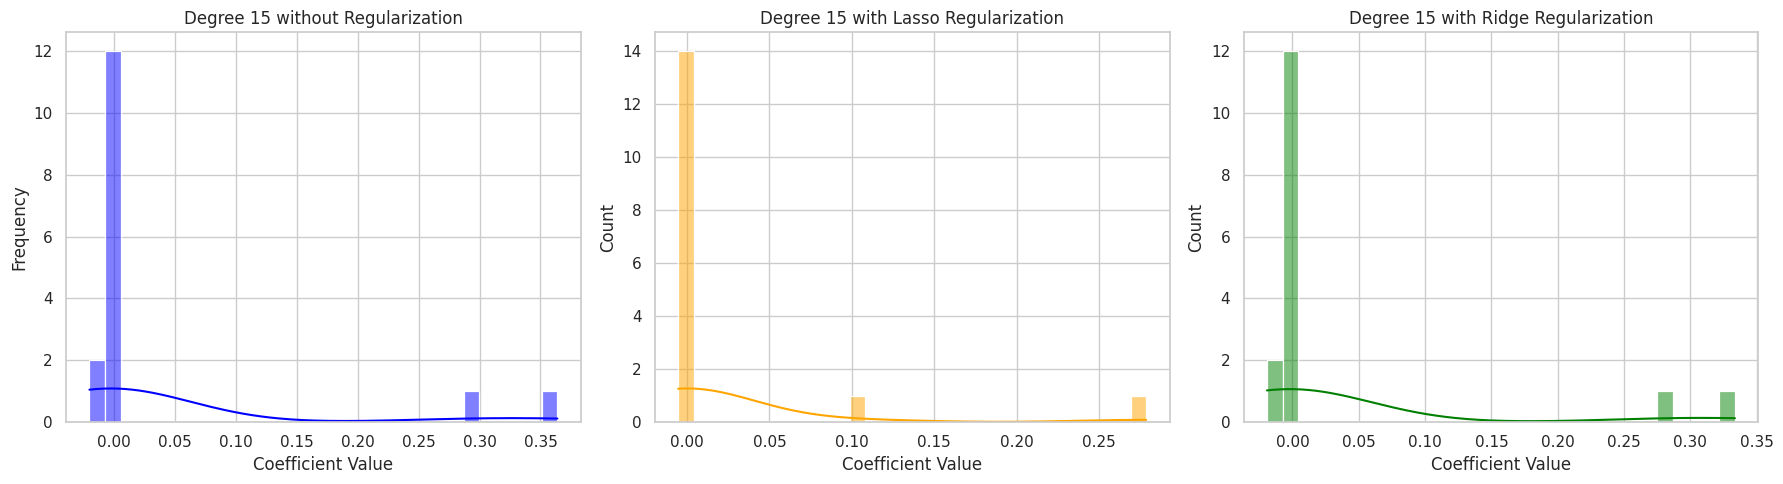

In [15]:
# Function to extract model coefficients
def get_model_coefficients(model):
    return model.coef_

# Extract coefficients for each model
coeffs_degree_15 = get_model_coefficients(model_degree_15)
coeffs_lasso = get_model_coefficients(model_lasso)
coeffs_ridge = get_model_coefficients(model_ridge)

# Plotting histograms of the coefficients
plt.figure(figsize=(18, 5))

# Histogram for Degree 15 without Regularization
plt.subplot(1, 3, 1)
sns.histplot(coeffs_degree_15, bins=30, kde=True, color='blue')
plt.title('Degree 15 without Regularization')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')

# Histogram for Degree 15 with Lasso Regularization
plt.subplot(1, 3, 2)
sns.histplot(coeffs_lasso, bins=30, kde=True, color='orange')
plt.title('Degree 15 with Lasso Regularization')
plt.xlabel('Coefficient Value')

# Histogram for Degree 15 with Ridge Regularization
plt.subplot(1, 3, 3)
sns.histplot(coeffs_ridge, bins=30, kde=True, color='green')
plt.title('Degree 15 with Ridge Regularization')
plt.xlabel('Coefficient Value')

plt.tight_layout()
plt.show()


Answer these questions:

1. Compare the results of models.

2. Explain the impact of each regularizer?

2. Which one is the best estimate of the true function? Why?

3. Compare the histograms and discuss their differences.

4. Which regularizer do you think is more robust to outlier data? Justify your answer.

<font color='#8FCF26' size='+2'>**A2:**</font>
### Analysis of Histograms:

1. **Degree 15 without Regularization:**
    - The coefficients vary widely in magnitude, some being significantly larger than others. This is typical of an overfitted model where the algorithm tries to capture every nuance in the data, including noise.

2. **Degree 15 with Lasso Regularization:**
    - Lasso regularization results in a distribution of coefficients that are closer to zero, reflecting its tendency to produce sparser models. Some coefficients might even be exactly zero, reducing the model's complexity.

3. **Degree 15 with Ridge Regularization:**
    - Ridge regularization leads to a more evenly distributed set of coefficients, with most values being shrunken towards zero but not exactly zero. This indicates a reduction in model complexity while still allowing the model to capture complex patterns.

### Comparative Observations:

- **Impact of Regularizers:**
   - Lasso (L1) regularization can zero out some coefficients, effectively performing feature selection.
   - Ridge (L2) regularization shrinks the coefficients towards zero but typically does not set them to zero.

- **Best Estimate of the True Function:**
   - The best model depends on the balance between bias and variance. Given the overfitting in the non-regularized model, either the Lasso or Ridge regularized model could be closer to the true function, with Ridge often being preferred in scenarios where we expect all features to contribute to the output.

- **Robustness to Outliers:**
   - Lasso regularization tends to be more robust to outliers in feature space because it can completely eliminate some features' influence by setting their coefficients to zero. This can be advantageous if the outliers are due to certain features.

There is another regularization technique called *elastic net regularization* which uses both $l^1$ and $l^2$ regularization terms. Elastic net linearly combines $l^1$ and $l^2$ penalty terms and tries to prevent the model from overfitting. Try to regularize the model using elastic net ($λ_1=λ_2=1$) and then plot data, your estimated function, and the true function in a single plot.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.245e+01, tolerance: 3.629e-02
  model = cd_fast.enet_coordinate_descent(
<ipython-input-11-8060f6f61ed8>:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=X_plot, y=Y_plot, label=label, palette=sns.color_palette("husl", 9) )


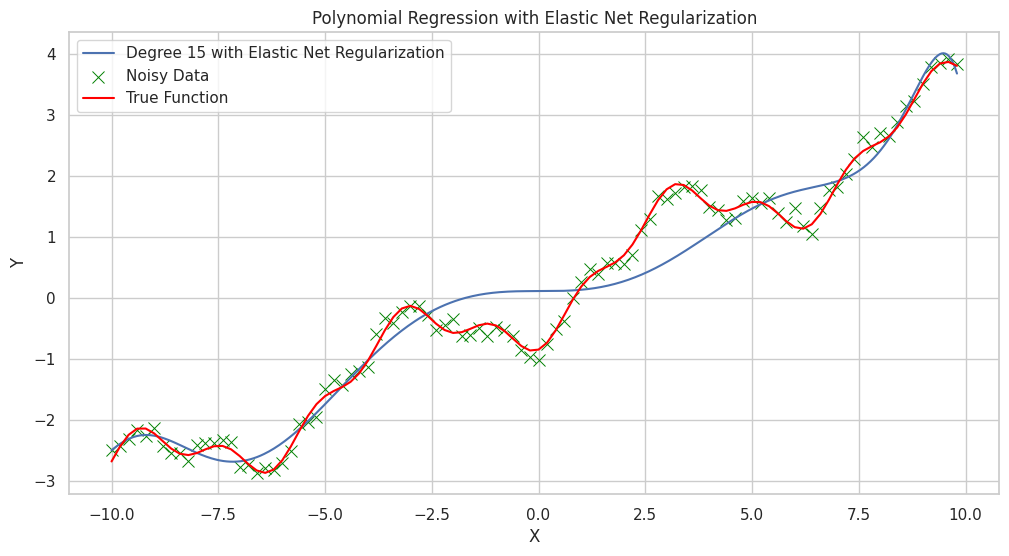

In [16]:
from sklearn.linear_model import ElasticNet

# Function to fit a polynomial model with Elastic Net regularization
def fit_poly_model_with_elastic_net(X, Y, degree, alpha1, alpha2):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X.reshape(-1, 1))

    # Elastic Net Regularization
    model = ElasticNet(alpha=alpha1 + alpha2, l1_ratio=alpha1 / (alpha1 + alpha2), max_iter=10000)

    model.fit(X_poly, Y)
    return model

# Regularize the model using Elastic Net (lambda1=lambda2=1)
model_elastic_net = fit_poly_model_with_elastic_net(X, Y_noisy, 15, alpha1=1, alpha2=1)

# Plotting with Seaborn
plt.figure(figsize=(12, 6))

# Plotting the estimated function with Elastic Net regularization
plot_poly_model_seaborn(X, Y_noisy, model_elastic_net, 15, 'Degree 15 with Elastic Net Regularization', show=False)

# Plotting the true function and the noisy data
sns.scatterplot(x=X, y=Y_noisy, color='green', label='Noisy Data', marker='x', s=75)
sns.lineplot(x=np.sort(X), y=2 * np.cos(np.sort(X)) / -np.pi + (2 * np.sort(X)) / (2 * np.pi) + 2 * np.cos(3 * np.sort(X)) / (-3 * np.pi),
             color='red', label='True Function')

plt.title('Polynomial Regression with Elastic Net Regularization')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## <font color='#D61E85' size='+3'>**Q3:**</font> <font size='+2'> **Bias-Variance Trade-off** </font>

Prove the below equation, which is called bias-variance decomposition:

$$\mathbb{E}[(y−f_s(x))^2] = (y − \mathbb{E}[f_s(x)] )^2 + \mathbb{E} [(\mathbb{E}[f_s(x)]−f_s(x))^2]$$

Using the above equation, interpret the following figure.

![](https://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

- In which area of the figure underfitting and overfitting will happen? why?

- Talk about the training error and generalization error w.r.t above figure and explain its relationship with bias and variance.

<font color='#8FCF26' size='+2'>**A3:**</font>

**Part 1: Proving the Bias-Variance Decomposition Equation**

The bias-variance decomposition is a fundamental concept in understanding the behavior of prediction models. It decomposes the expected squared error of a model into two components: bias and variance. The equation to be proved is:

$ \mathbb{E}[(y−f_s(x))^2] = (y − \mathbb{E}[f_s(x)] )^2 + \mathbb{E} [( \mathbb{E}[f_s(x)]−f_s(x))^2] $

To prove this, we start with the left-hand side of the equation, which is the expected squared error, and then expand and rearrange it:

1. Start with the expected squared error:
   $$ \mathbb{E}[(y−f_s(x))^2] $$

2. Expand the squared term and rearrange:
   $$ \mathbb{E}[y^2 - 2yf_s(x) + f_s(x)^2] $$

3. Rewrite using properties of expectation:
   $$ \mathbb{E}[y^2] - 2\mathbb{E}[yf_s(x)] + \mathbb{E}[f_s(x)^2] $$

4. Introduce and subtract the term $ \mathbb{E}[f_s(x)]^2 $:
   $$ \mathbb{E}[y^2] - 2y\mathbb{E}[f_s(x)] + \mathbb{E}[f_s(x)]^2 - \mathbb{E}[f_s(x)]^2 + \mathbb{E}[f_s(x)^2] $$

5. Reorganize to form the bias and variance terms:
   $$ (y - \mathbb{E}[f_s(x)])^2 + \mathbb{E}[f_s(x)^2] - \mathbb{E}[f_s(x)]^2 $$

6. Apply the law of total variance:
   $$ (y - \mathbb{E}[f_s(x)])^2 + \mathbb{E}[(\mathbb{E}[f_s(x)] - f_s(x))^2] $$

This equation shows that the expected squared error can be decomposed into a sum of the square of bias and the variance.

**Part 2: Interpretation of the Figure and Discussion**

- **Underfitting:** This occurs in areas where the model is too simplistic, leading to high bias but low variance. It is usually characterized by a high error on both the training and test sets, indicating that the model fails to capture the underlying patterns in the data.

- **Overfitting:** This happens when the model is too complex, leading to low bias but high variance. Overfitting is marked by a low error on the training set but a high error on the test set, showing that the model captures noise and specificities of the training data rather than the general trend.

- **Training Error and Generalization Error:**
   - **Training Error (Bias):** Represents the error of the model on the training data. Models with high bias (underfitting) fail to capture the complexities of the data, resulting in high training error.
   - **Generalization Error (Variance):** Represents the error of the model on new, unseen data. Models with high variance (overfitting) perform well on the training data but poorly on new data due to their sensitivity to specific characteristics of the training set.

The relationship between bias and variance is typically inversely proportional, making it a trade-off. Reducing bias usually increases variance and vice versa, necessitating a balance for optimal model performance.

## <font color='#D61E85' size='+3'>**Q4:**</font> <font size='+2'> **Circle** </font>

In this problem, we will use logistic regression to separate points inside a circle from the outside ones. The code below uses the random functions of the NumPy library to uniformly generate data inside a square A*A centered at (x1_0, x2_0). Points that lie inside the circle (x1_0,x2_0,R) get labeled 1 and vice versa.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

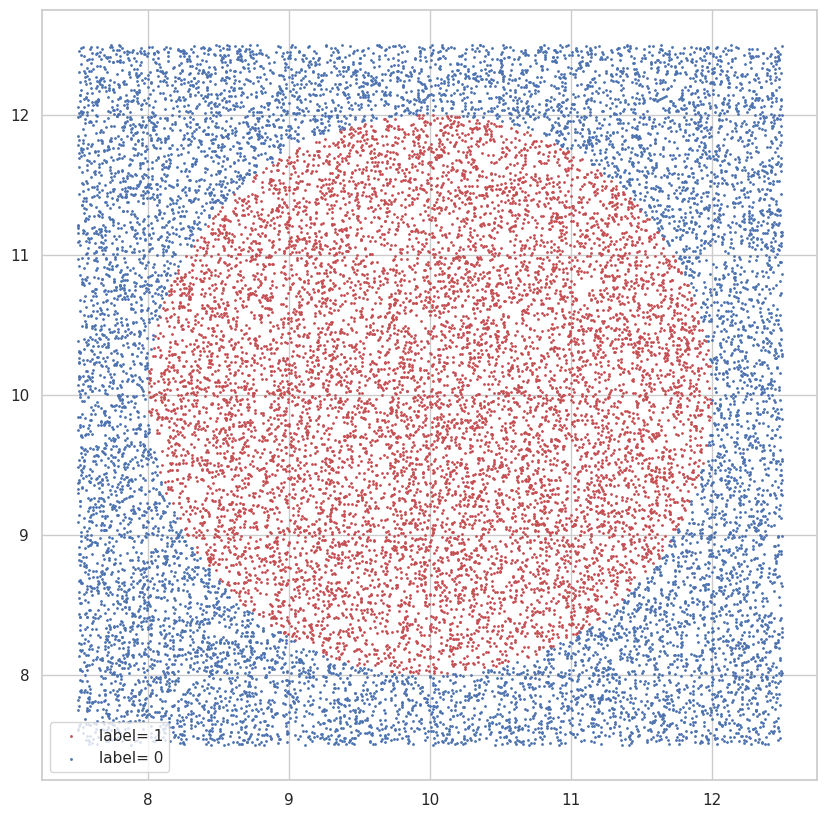

In [18]:
x1_0 = 10
x2_0 = 10
A = 5
N = 20000
R = 2

x1 = A *np.random.rand(N) + x1_0 - A/2
x2 = A *np.random.rand(N) + x2_0 - A/2
rr = np.square(x1-x1_0) + np.square(x2-x2_0)
label = rr<= R**2

plt.figure(figsize = (10,10))
plt.scatter(x1[label==1], x2[label==1],c='r', s= 1, label="label= 1")
plt.scatter(x1[label==0], x2[label==0],c='b' ,s =1, label="label= 0")
plt.legend()

Using the logistic regression model in Scikit-learn library we want to classify these points.

### Step 1
In this step, use x1 and x2 as input features.

You should do:

1. Split the data into the test set and train set (with ratio = 0.5).

2. Create a logistic regression model (without penalty).

2. Feed the training points into your model and train it.

3. Using your trained model, predict labels of the test set.

4. Plot the data such that their color represents their predicted label (like the previous image).

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Preparing the data
X = np.column_stack((x1, x2))
y = label

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Creating and training the logistic regression model
log_reg = LogisticRegression(penalty='none')  # 'none' indicates no regularization
log_reg.fit(X_train, y_train)

# Predicting labels for the test set
y_pred = log_reg.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


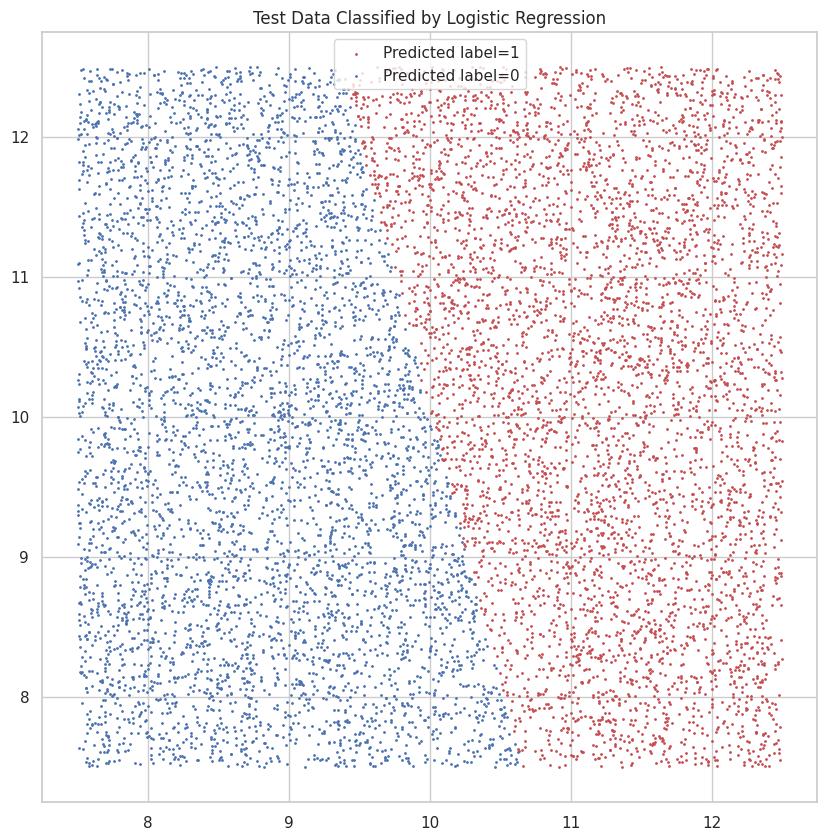

In [20]:
# Plotting the data with predicted labels
plt.figure(figsize=(10, 10))
plt.scatter(X_test[y_pred == 1][:, 0], X_test[y_pred == 1][:, 1], c='r', s=1, label="Predicted label=1")
plt.scatter(X_test[y_pred == 0][:, 0], X_test[y_pred == 0][:, 1], c='b', s=1, label="Predicted label=0")
plt.title("Test Data Classified by Logistic Regression")
plt.legend()
plt.show()


Answer these questions:

1. Explain what logistic regression is.

2. Write its formula for this problem (be specific about the dimension of the variables).

3. Learning is all about finding unknown parameters of the model to make it fit the training data. Point out the unknown parameters of your logistic regression model.


1. Logistic regression is a statistical method used for binary classification. It predicts the probability that a given input point belongs to a certain class. Unlike linear regression which predicts a continuous output, logistic regression predicts a binary outcome (\$1/0\$, Yes/No, True/False). It's based on the concept of odds ratios and uses the logistic function (or sigmoid function) to model the probability of a particular class or event.

2.
For this problem, the logistic regression model can be formulated as follows:

$$ p(y = 1 | \mathbf{x}; \mathbf{\theta}) = \sigma(\theta_0 + \theta_1 x_1 + \theta_2 x_2) $$

where:
- \$ \mathbf{x} = [x_1, x_2] \$ is the input feature vector (2-dimensional in this case, representing the coordinates of a point).
- \$ \mathbf{\theta} = [\theta_0, \theta_1, \theta_2] \$ are the parameters of the model, including the intercept \$ \theta_0 \$ and the coefficients \$ \theta_1 \$ and \$ \theta_2 \$ for each feature.
- \$ \sigma(z) = \frac{1}{1 + e^{-z}} \$ is the logistic (sigmoid) function that maps the linear combination of inputs and parameters to a probability between 0 and 1.

3.

The unknown parameters of the logistic regression model are the coefficients \$ \mathbf{\theta} = [\theta_0, \theta_1, \theta_2] \$. These include:
- \$ \theta_0 \$: The intercept term.
- \$ \theta_1 \$: The coefficient for the \$ x_1 \$ feature.
- \$ \theta_2 \$: The coefficient for the \$ x_2 \$ feature.

The learning process in logistic regression involves adjusting these parameters to minimize a cost function (typically the binary cross-entropy loss) using the training data. This is usually achieved through optimization techniques like gradient descent.


As you can probably see, your model is a big mess.
Can you guess why?


**Non-Linear Boundary**: Logistic regression is a linear model which means it assumes a linear decision boundary. However, the problem at hand involves classifying points inside and outside a circle, which requires a non-linear decision boundary. Logistic regression have struggle to accurately model this circular boundary with its linear approach.

Answer these questions:

1. With respect to your model, specify TP, TN, FP, and FN points. (plot them in 4 different colors)

2. Report the following metrics for your model: accuracy, precision (sensitivity), recall, and specificity.

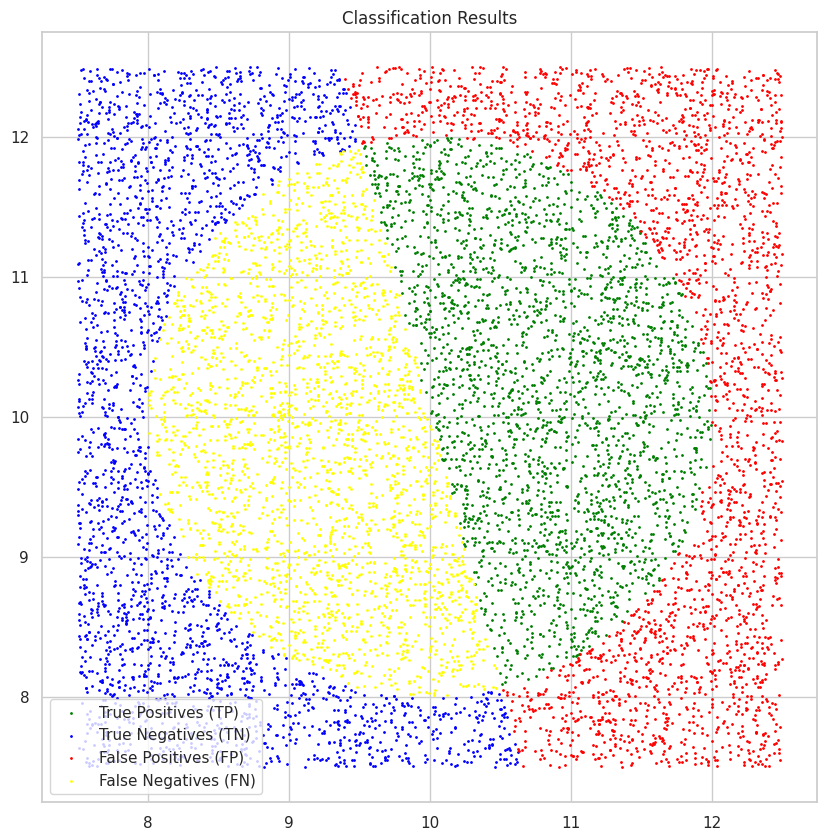

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Identifying TP, TN, FP, FN
TP = ((y_pred == 1) & (y_test == 1))
TN = ((y_pred == 0) & (y_test == 0))
FP = ((y_pred == 1) & (y_test == 0))
FN = ((y_pred == 0) & (y_test == 1))

# Plotting TP, TN, FP, FN
plt.figure(figsize=(10, 10))
plt.scatter(X_test[TP][:, 0], X_test[TP][:, 1], c='green', s=1, label="True Positives (TP)")
plt.scatter(X_test[TN][:, 0], X_test[TN][:, 1], c='blue', s=1, label="True Negatives (TN)")
plt.scatter(X_test[FP][:, 0], X_test[FP][:, 1], c='red', s=1, label="False Positives (FP)")
plt.scatter(X_test[FN][:, 0], X_test[FN][:, 1], c='yellow', s=1, label="False Negatives (FN)")
plt.title("Classification Results")
plt.legend()
plt.show()


In [22]:
# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # Precision is the same as sensitivity in binary classification
recall = recall_score(y_test, y_pred)       # Recall is the same as true positive rate
conf_matrix = confusion_matrix(y_test, y_pred)
specificity = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])

accuracy, precision, recall, specificity


(0.5066, 0.5106639839034205, 0.5035714285714286, 0.5096774193548387)

###Step 2

Now it is time to do some serious work!

To train a model that actually works, we need to use something called [Kernel](https://en.wikipedia.org/wiki/Kernel_method).
To put it simply, Kernel is a transformation that transforms input space into a feature space. By mapping the inputs to the feature space, we would have some features that are more usable for our model. In other words, sometimes our model is not that complex to extract those features by itself (e.g., linear regression), so Kernel does it for the model.

You should do:

1. Find a proper kernel for our problem (be careful! the circle was not centered at (0,0)).
2. Convert the inputs using the Kernel.
3. Feed the resulting features into the model and train it.
4. Evaluate your model on the test set (plot points with the predicted labels).
5. What is the accuracy of your model now? (Congratulation!!)


In [23]:
# Transforming the inputs considering the circle's center
X_kernel_transformed = np.column_stack(((x1 - x1_0)**2, (x2 - x2_0)**2))

# Splitting the kernel-transformed data into train and test sets
X_train_kernel, X_test_kernel, y_train, y_test = train_test_split(X_kernel_transformed, y, test_size=0.5, random_state=42)

# Training the logistic regression model on the kernel-transformed data
log_reg_kernel = LogisticRegression(penalty='none')
log_reg_kernel.fit(X_train_kernel, y_train)

# Evaluating the model on the test set
y_pred_kernel = log_reg_kernel.predict(X_test_kernel)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


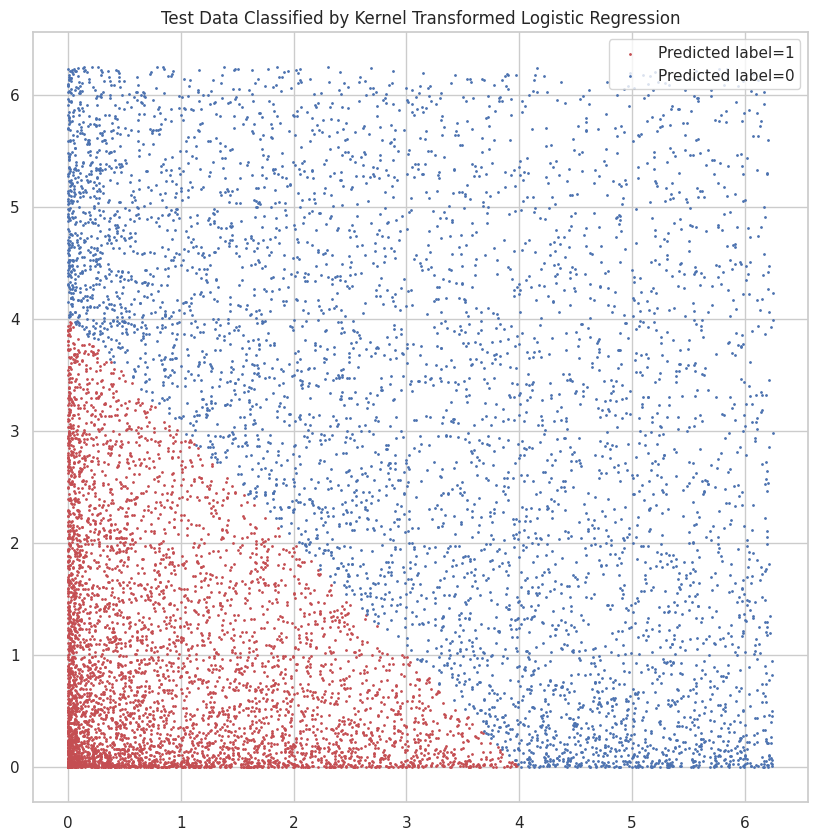

In [24]:
# Plotting the data with predicted labels
plt.figure(figsize=(10, 10))
plt.scatter(X_test_kernel[y_pred_kernel == 1][:, 0], X_test_kernel[y_pred_kernel == 1][:, 1], c='r', s=1, label="Predicted label=1")
plt.scatter(X_test_kernel[y_pred_kernel == 0][:, 0], X_test_kernel[y_pred_kernel == 0][:, 1], c='b', s=1, label="Predicted label=0")
plt.title("Test Data Classified by Kernel Transformed Logistic Regression")
plt.legend()
plt.show()

In [25]:
# Calculating the accuracy
accuracy_kernel = accuracy_score(y_test, y_pred_kernel)
accuracy_kernel

1.0

## <font color='#D61E85' size='+3'>**Q5:**</font> <font size='+2'> **Logistic Regression** </font>

In this question you need to implement logistic regression from scratch. Then you will use it and try to reproduce the results of previous question.

In [26]:
class CustomLogisticRegression:
    def __init__(self, lr, num_iter, random_state=42):
        """
        lr: learning rate
        num_iter: number of iterations over the training data
        random_state: random state to initialize random weights
        """
        self.lr = lr
        self.num_iter = num_iter
        np.random.seed(random_state)  # Set random seed
        self.weights = None
        self.losses = []

    def activation(self, z):
        """Compute logistic sigmoid activation."""
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Fit the model according to the given training data.
        X : Training data, shape = [n_examples, n_features]
        y : Target values, shape = [n_examples]
        """
        n_samples, n_features = X.shape
        self.weights = np.random.normal(0, 0.01, n_features + 1)  # Include bias term

        # Add bias term to X
        X_bias = np.hstack((np.ones((n_samples, 1)), X))

        # Gradient Descent
        for i in range(self.num_iter):
            # Linear combination
            linear_model = np.dot(X_bias, self.weights)
            # Apply sigmoid function
            y_predicted = self.activation(linear_model)

            # Calculate the error
            error = y_predicted - y

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X_bias.T, error)
            # Update weights
            self.weights -= self.lr * dw

            # Calculate the cost (log loss)
            loss = -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
            self.losses.append(loss)

        return self

    def predict(self, X):
        """Return class label prediction."""
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term to X
        linear_model = np.dot(X_bias, self.weights)
        y_predicted = self.activation(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)




Now, use your implementation to reproduce the results of previous question. Also, try to plot the learning curve of your training process.

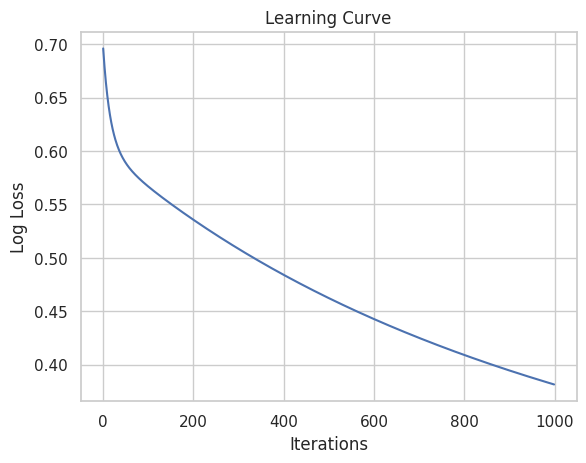

0.8678

In [27]:
# Using the kernel-transformed data
# Train the custom logistic regression model
custom_log_reg = CustomLogisticRegression(lr=0.01, num_iter=1000)
custom_log_reg.fit(X_train_kernel, y_train)

# Predict on the test set and calculate accuracy
y_pred_custom = custom_log_reg.predict(X_test_kernel)
custom_accuracy = accuracy_score(y_test, y_pred_custom)

# Plot the learning curve
plt.plot(custom_log_reg.losses)
plt.title("Learning Curve")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.show()

custom_accuracy